In [1]:
# 31-07-25, Thursday;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = [10, 15, 20, 20, 25, 30, 30, 30, 40, 100]

print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Mode:", stats.mode(data))

Mean: 32.0
Median: 27.5
Mode: ModeResult(mode=np.int64(30), count=np.int64(3))


<Axes: >

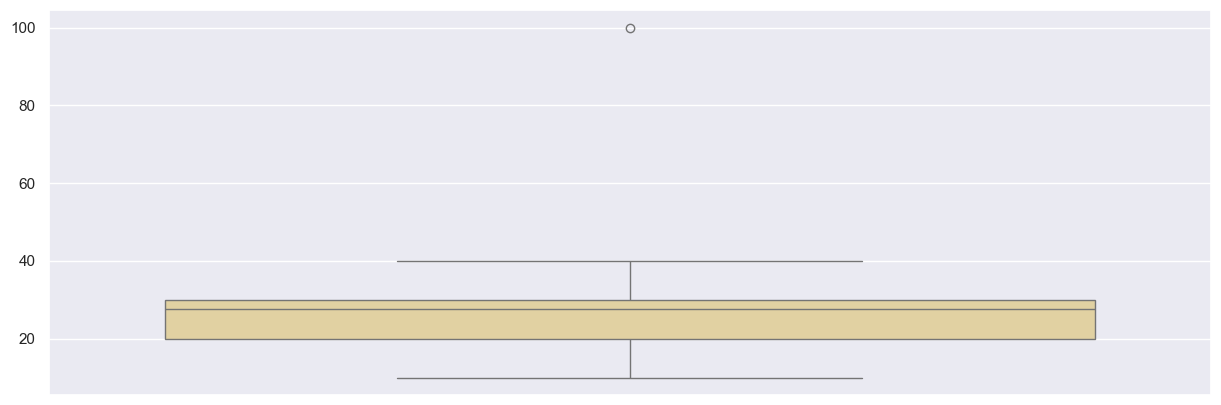

In [3]:
# Above could mean, we have outliers greater than 40. as mean is greater than median.

sns.set(rc = {"figure.figsize": (15, 5)})
sns.boxplot(data, color = "#EBD698")

In [4]:
sales = [120, 130 ,145, 150, 160, 170, 170, 180, 200, 250]
range_of_vals = np.max(sales) - np.min(sales)
range_of_vals # Greater the range, greater the spread.

np.int64(130)

In [5]:
print("Population Mean:", np.mean(sales))
print("Population Variance:", np.var(sales))
print("Standard Deviation:", np.std(sales))

Population Mean: 167.5
Population Variance: 1256.25
Standard Deviation: 35.443617196894564


In [6]:
np.mean(sales) + 2 * np.std(sales)

np.float64(238.38723439378913)

In [7]:
np.mean(sales) - 2 * np.std(sales)

np.float64(96.61276560621087)

<Axes: >

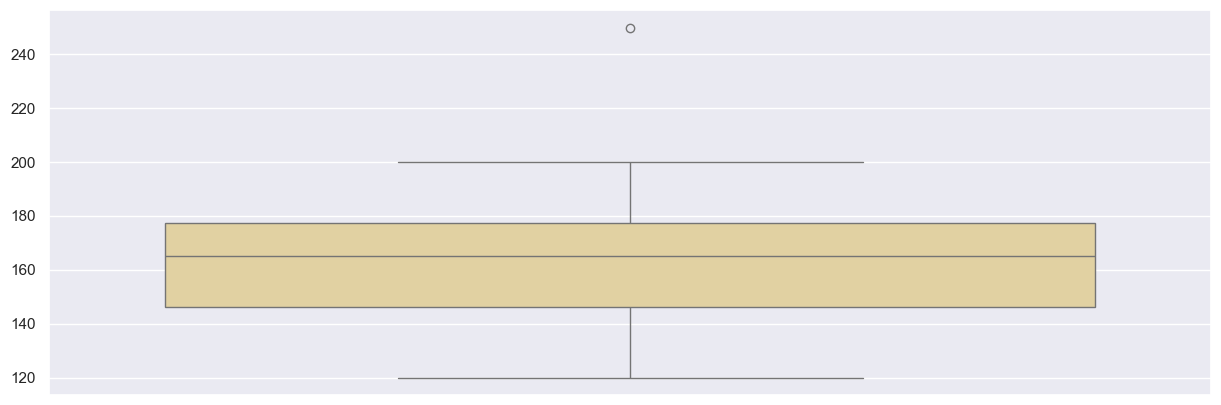

In [8]:
sns.boxplot(sales, color = "#EBD698")

<Axes: ylabel='Count'>

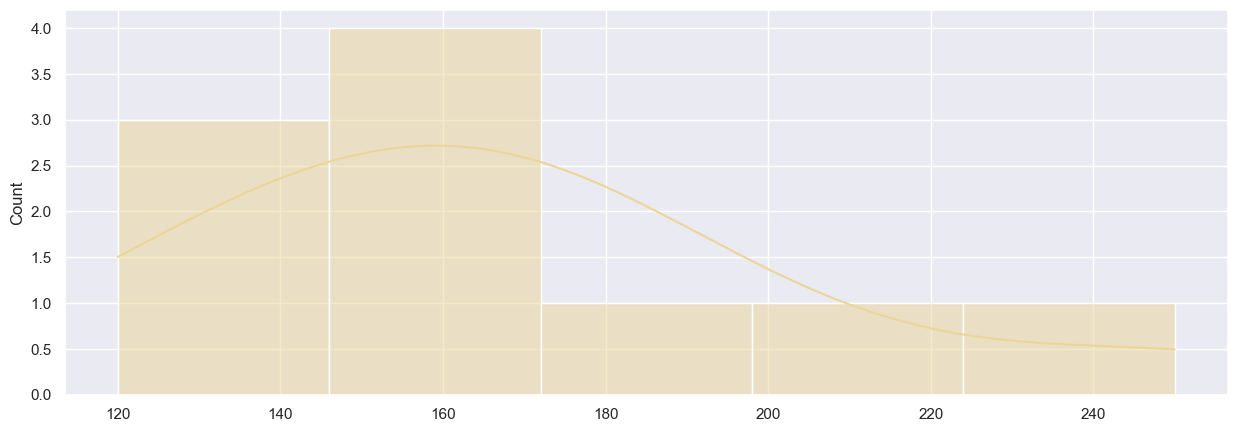

In [9]:
sns.histplot(sales, color = "#EBD698", kde = True)

In [10]:
data1 = {
    "month": pd.date_range(start = "2023-01-01", periods = 12, freq = "ME"), #ME is month end.
    "sales": [200, 220, 250, 230, 260, 280, 300, 310, 290, 320, 330,340]
}

df1= pd.DataFrame(data1)
df1

,month,sales
0,2023-01-31,200
1,2023-02-28,220
2,2023-03-31,250
3,2023-04-30,230
4,2023-05-31,260
5,2023-06-30,280
6,2023-07-31,300
7,2023-08-31,310
8,2023-09-30,290
9,2023-10-31,320


<Axes: xlabel='sales', ylabel='Count'>

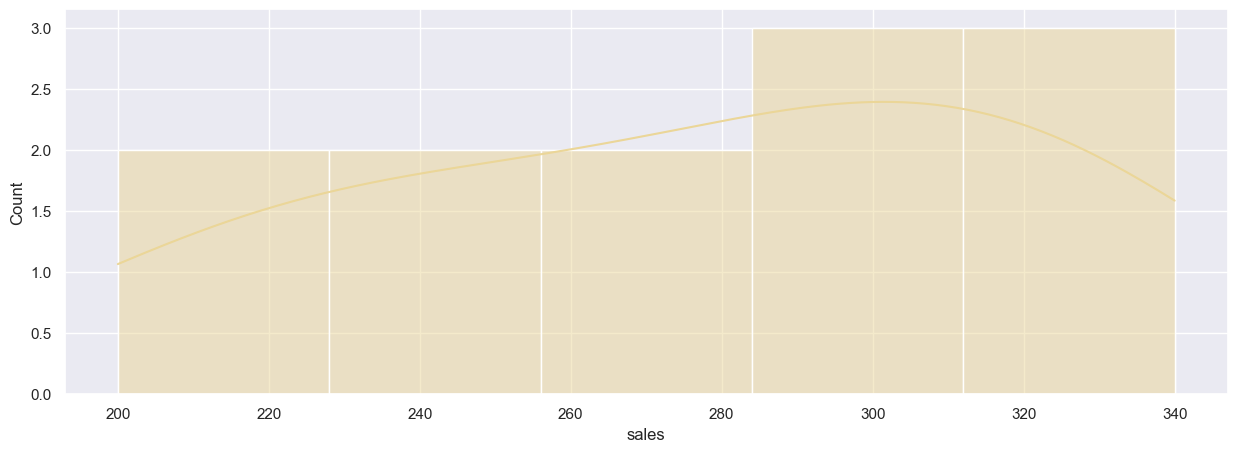

In [11]:
sns.histplot(data = df1["sales"], color = "#EBD698", kde = True)

<Axes: ylabel='sales'>

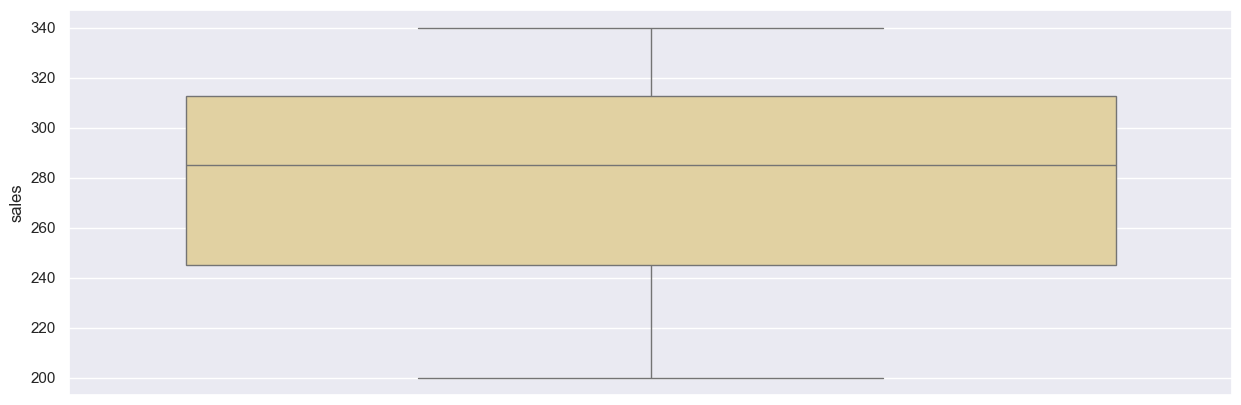

In [12]:
sns.boxplot(data = df1["sales"], color = "#EBD698")

In [13]:
df1.describe()

,month,sales
count,12,12.000000
mean,2023-07-15 22:00:00,277.500000
min,2023-01-31 00:00:00,200.000000
25%,2023-04-22 12:00:00,245.000000
50%,2023-07-15 12:00:00,285.000000
75%,2023-10-07 18:00:00,312.500000
max,2023-12-31 00:00:00,340.000000
std,NaN,45.552168


In [14]:
from sklearn.linear_model import LinearRegression

In [33]:
X = np.array(df1.index).reshape(-1, 1) # converted to 2D array, it's X-axis.
Y = np.array(df1["sales"])

model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
next_Q_index = np.array([12, 13,14]).reshape(-1, 1)
predicted_sales = model.predict(next_Q_index)

predicted_sales

array([356.81818182, 369.02097902, 381.22377622])

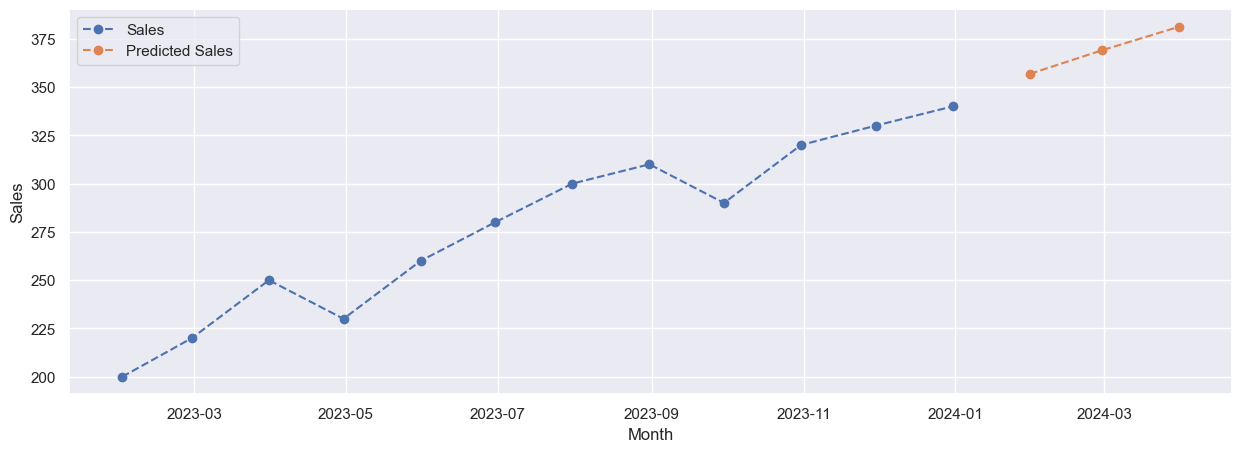

In [45]:
plt.plot(df1["month"], df1["sales"], "o", label = "Sales", linestyle = "--")
next_Q_months = pd.date_range(start = df1["month"].iloc[-1] + pd.DateOffset(months = 1), periods = 3, freq = "ME")
plt.plot(next_Q_months, predicted_sales, "o", label = "Predicted Sales", linestyle = "--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

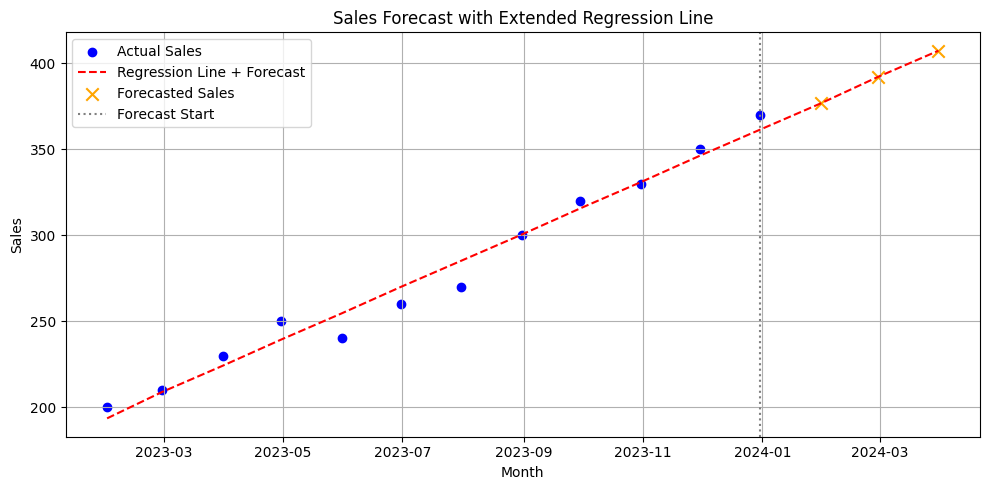

In [2]:
# 1. Simulated monthly sales data
months = np.arange(1, 13).reshape(-1, 1)  # months 1 to 12
sales = np.array([200, 210, 230, 250, 240, 260, 270, 300, 320, 330, 350, 370])

# 2. Fit linear regression
model = LinearRegression()
model.fit(months, sales)

# 3. Extend to future months (13–15)
future_months = np.arange(13, 16).reshape(-1, 1)
all_months = np.arange(1, 16).reshape(-1, 1)  # 1 to 15

# 4. Predict for all months (historical + future)
predicted_sales = model.predict(all_months)

# 5. Create date index (Jan 2023 to Mar 2024)
dates = pd.date_range(start='2023-01-01', periods=15, freq='ME')

# 6. Plot everything
plt.figure(figsize=(10, 5))

# Historical points
plt.scatter(dates[:12], sales, label='Actual Sales', color='blue')

# Regression line across all months
plt.plot(dates, predicted_sales, label='Regression Line + Forecast', color='red', linestyle='--')

# Forecasted points
plt.scatter(dates[12:], predicted_sales[12:], label='Forecasted Sales', color='orange', marker='x', s=80)

# Decorations
plt.axvline(dates[11], color='gray', linestyle=':', label='Forecast Start')
plt.title("Sales Forecast with Extended Regression Line")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
